In [1]:
# --------------------------------
# Name: grid_convergence.ipynb
# Author: Brian R. Greene
# University of Oklahoma
# Created: 23 February 2022
# Purpose: Read xyt mean netcdf files for sims A & F at
# 96^3, 128^3, 160^3, and 192^3 resolutions to plot
# --------------------------------

### Import packages and setup plotting

In [2]:
%matplotlib inline
import sys
sys.path.append("/home/bgreene/SBL_LES/python/")
import os
import seaborn
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESnc import load_stats

In [3]:
# Configure plots
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
colors = seaborn.color_palette("cubehelix", 4)
props=dict(boxstyle="square",facecolor="white",edgecolor="white",alpha=0.0)
# colors = seaborn.color_palette("colorblind")
fdir_save = "/home/bgreene/SBL_LES/figures/grid_convergence/"
if not os.path.exists(fdir_save):
    os.mkdir(fdir_save)
plt.close("all")

In [4]:
colors

[(0.08605633600581403, 0.23824692404212, 0.30561236308077167),
 (0.32927729263408284, 0.4762845556584382, 0.1837155549758328),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

### Load netcdf stats files

Sort by stability and grid size

In [5]:
stabs = ["A", "F"]
res = ["096", "128", "160", "192"]
A_all, F_all = [], []
for r in res:
    fread = f"/home/bgreene/simulations/cr0.25_u08_{r}/output/netcdf/average_statistics.nc"
    A_all.append(load_stats(fread))
for r in res:
    fread = f"/home/bgreene/simulations/cr2.50_u08_{r}/output/netcdf/average_statistics.nc"
    F_all.append(load_stats(fread))

Reading file: /home/bgreene/simulations/cr0.25_u08_096/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_128/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_160/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_096/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_128/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_160/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_192/output/netcdf/average_statistics.nc


### Print table of parameters

In [6]:
print("---A---")
for s in A_all:
    print(f"Res: {s.nx}")
    print(f"dx: {s.dx:3.2f} m")
    print(f"dz: {s.dz:3.2f} m")
    print(f"df: {s.delta:3.2f} m")
    print(f"h:  {s.h.values:3.1f} m")
    print(f"L0: {s.L.values:3.1f} m")
    print(f"h/L: {(s.h/s.L).values:3.2f}")
    print(f"u*0: {s.ustar0.values:4.3} m/s")
    print(f"zj/h: {(s.z.isel(z=s.uh.argmax())/s.h).values:4.3f}")
    print("--")
print("---F---")
for s in F_all:
    print(f"Res: {s.nx}")
    print(f"dx: {s.dx:3.2f} m")
    print(f"dz: {s.dz:3.2f} m")
    print(f"df: {s.delta:3.2f} m")
    print(f"h:  {s.h.values:3.2f} m")
    print(f"L0: {s.L.values:3.2f} m")
    print(f"h/L: {(s.h/s.L).values:3.2f}")
    print(f"u*0: {s.ustar0.values:4.3} m/s")
    print(f"zj/h: {(s.z.isel(z=s.uh.argmax())/s.h).values:4.3f}")
    print("--")

---A---
Res: 96
dx: 8.33 m
dz: 4.17 m
df: 6.61 m
h:  175.0 m
L0: 93.0 m
h/L: 1.88
u*0: 0.239 m/s
zj/h: 0.926
--
Res: 128
dx: 6.25 m
dz: 3.12 m
df: 4.96 m
h:  167.4 m
L0: 91.2 m
h/L: 1.84
u*0: 0.232 m/s
zj/h: 0.950
--
Res: 160
dx: 5.00 m
dz: 2.50 m
df: 3.97 m
h:  165.5 m
L0: 93.0 m
h/L: 1.78
u*0: 0.233 m/s
zj/h: 0.950
--
Res: 192
dx: 4.17 m
dz: 2.08 m
df: 3.31 m
h:  159.8 m
L0: 93.5 m
h/L: 1.71
u*0: 0.231 m/s
zj/h: 0.976
--
---F---
Res: 96
dx: 8.33 m
dz: 4.17 m
df: 6.61 m
h:  99.70 m
L0: 7.64 m
h/L: 13.05
u*0: 0.177 m/s
zj/h: 0.908
--
Res: 128
dx: 6.25 m
dz: 3.12 m
df: 4.96 m
h:  91.16 m
L0: 7.61 m
h/L: 11.98
u*0: 0.174 m/s
zj/h: 0.915
--
Res: 160
dx: 5.00 m
dz: 2.50 m
df: 3.97 m
h:  83.41 m
L0: 7.47 m
h/L: 11.17
u*0: 0.17 m/s
zj/h: 0.950
--
Res: 192
dx: 4.17 m
dz: 2.08 m
df: 3.31 m
h:  80.46 m
L0: 7.28 m
h/L: 11.05
u*0: 0.166 m/s
zj/h: 0.924
--


### Begin plotting

Figure 1: Sim A u_h, alpha, theta; ustar2, theta'w', u'u' versus z/h

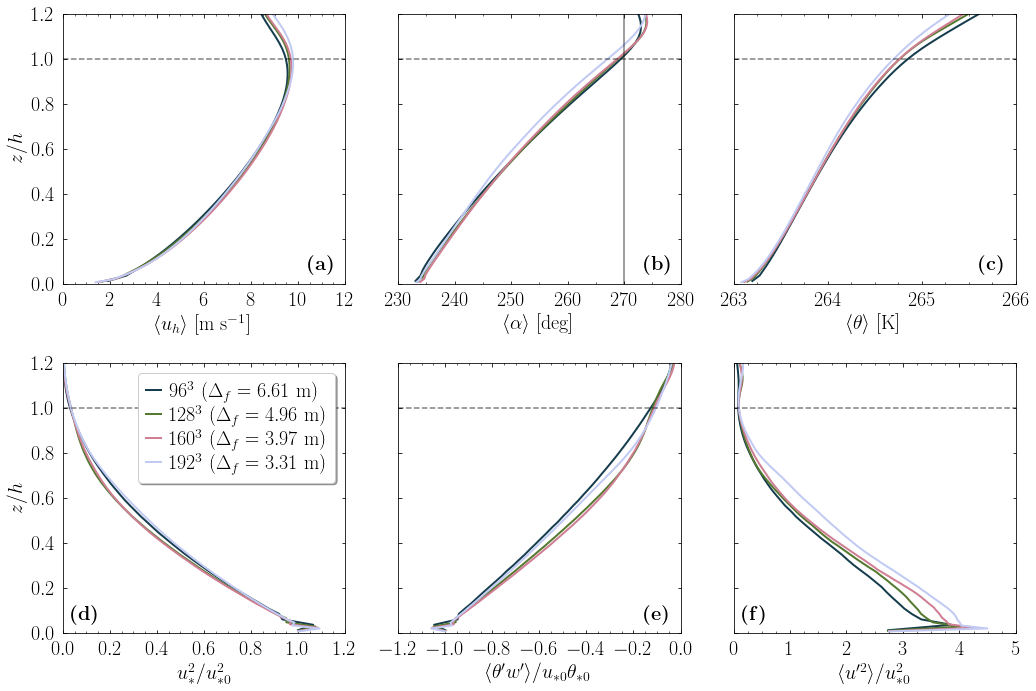

In [7]:
fig1, ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(14.8, 10))
for i, s in enumerate(A_all):
    # (a) u_h
    ax1[0,0].plot(s.uh, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (b) alpha
    ax1[0,1].plot(s.wdir, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (c) theta
    ax1[0,2].plot(s.theta_mean, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (d) ustar^2
    ax1[1,0].plot(s.ustar2/s.ustar0/s.ustar0, s.z/s.h, ls="-", c=colors[i], lw=2,
                  label=f"{s.nx}$^3$ ($\\Delta_f = {{{s.delta:3.2f}}}$ m)")
    # (e) ustar^2
    ax1[1,1].plot(s.tw_cov_tot/s.ustar0/s.tstar0, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (f) u'u'
    ax1[1,2].plot(s.u_var_rot/s.ustar0/s.ustar0, s.z/s.h, ls="-", c=colors[i], lw=2)
# clean up
# (a)
ax1[0,0].set_ylabel("$z/h$")
ax1[0,0].set_ylim([0, 1.2])
ax1[0,0].set_xlabel("$\\langle u_h \\rangle$ [m s$^{-1}$]")
ax1[0,0].set_xlim([0, 12])
ax1[0,0].xaxis.set_major_locator(MultipleLocator(2))
ax1[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax1[0,0].text(0.87,0.05,r'\textbf{(a)}',fontsize=20,bbox=props, 
              transform=ax1[0,0].transAxes)
# (b)
ax1[0,1].set_xlabel("$\\langle \\alpha \\rangle$ [deg]")
ax1[0,1].set_xlim([230, 280])
ax1[0,1].xaxis.set_major_locator(MultipleLocator(10))
ax1[0,1].xaxis.set_minor_locator(MultipleLocator(5))
ax1[0,1].axvline(270, c="k", alpha=0.5)
ax1[0,1].text(0.87,0.05,r'\textbf{(b)}',fontsize=20,bbox=props, 
              transform=ax1[0,1].transAxes)
# (c)
ax1[0,2].set_xlabel("$\\langle \\theta \\rangle$ [K]")
ax1[0,2].set_xlim([263, 266])
ax1[0,2].xaxis.set_major_locator(MultipleLocator(1))
ax1[0,2].xaxis.set_minor_locator(MultipleLocator(0.25))
ax1[0,2].text(0.87,0.05,r'\textbf{(c)}',fontsize=20,bbox=props, 
              transform=ax1[0,2].transAxes)
# (d)
ax1[1,0].set_ylabel("$z/h$")
ax1[1,0].set_xlabel("$u_{*}^2 / u_{*0}^2$")
ax1[1,0].set_xlim([0, 1.2])
ax1[1,0].xaxis.set_major_locator(MultipleLocator(0.2))
ax1[1,0].xaxis.set_minor_locator(MultipleLocator(0.05))
ax1[1,0].legend(loc="upper right", labelspacing=0.10, 
                handletextpad=0.4, shadow=True, handlelength=0.75)
ax1[1,0].text(0.03,0.05,r'\textbf{(d)}',fontsize=20,bbox=props, 
              transform=ax1[1,0].transAxes)
# (e)
ax1[1,1].set_xlabel("$\\langle \\theta'w' \\rangle / u_{*0} \\theta_{*0}$")
ax1[1,1].set_xlim([-1.2, 0])
ax1[1,1].xaxis.set_major_locator(MultipleLocator(0.2))
ax1[1,1].xaxis.set_minor_locator(MultipleLocator(0.05))
ax1[1,1].text(0.87,0.05,r'\textbf{(e)}',fontsize=20,bbox=props, 
              transform=ax1[1,1].transAxes)
# (f)
ax1[1,2].set_xlabel("$\\langle u'^2 \\rangle / u_{*0}^2$")
ax1[1,2].set_xlim([0, 5])
ax1[1,2].xaxis.set_major_locator(MultipleLocator(1))
ax1[1,2].xaxis.set_minor_locator(MultipleLocator(0.25))
ax1[1,2].text(0.03,0.05,r'\textbf{(f)}',fontsize=20,bbox=props, 
              transform=ax1[1,2].transAxes)
# add horizontal line at z/h = 1 for all
# tick lines inside plot
for iax in ax1.flatten():
    iax.axhline(1.0, c="k", alpha=0.5, ls="--")
    iax.tick_params(which="both", direction="in", top=True, right=True, pad=8)
# save and close
fig1.tight_layout()
fig1.savefig(f"{fdir_save}A_grid_v2.pdf", format="pdf")
# plt.close(fig1)

Figure 2: Sim F u_h, alpha, theta; ustar2, theta'w', u'u' versus z/h


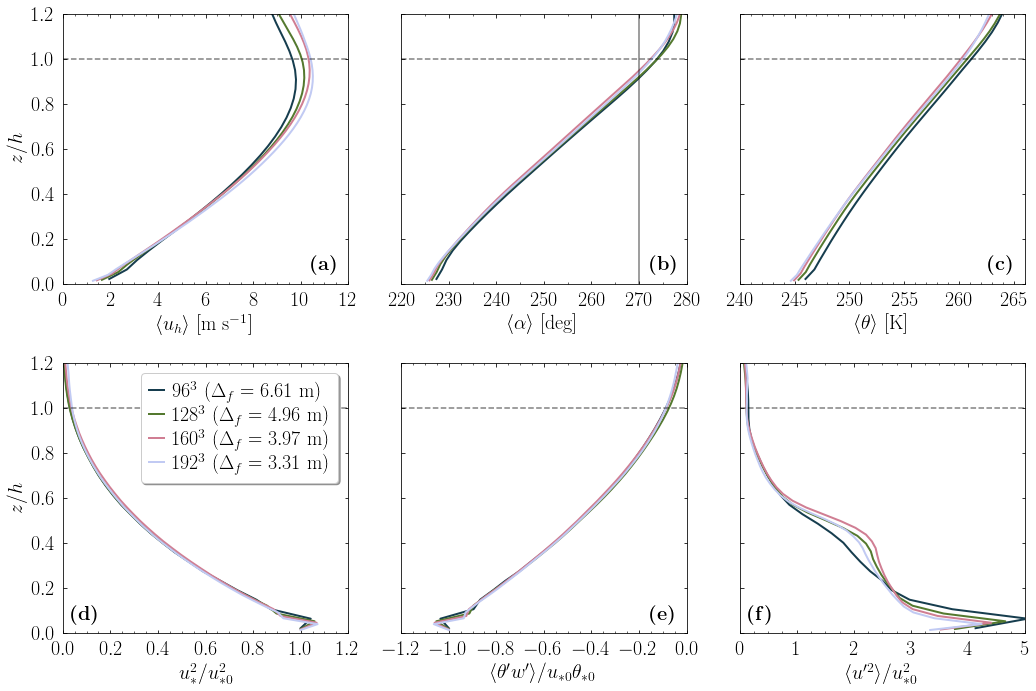

In [8]:
fig2, ax2 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(14.8, 10))
for i, s in enumerate(F_all):
    # (a) u_h
    ax2[0,0].plot(s.uh, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (b) alpha
    ax2[0,1].plot(s.wdir, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (c) theta
    ax2[0,2].plot(s.theta_mean, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (d) ustar^2
    ax2[1,0].plot(s.ustar2/s.ustar0/s.ustar0, s.z/s.h, ls="-", c=colors[i], lw=2,
                  label=f"{s.nx}$^3$ ($\\Delta_f = {{{s.delta:3.2f}}}$ m)")
    # (e) ustar^2
    ax2[1,1].plot(s.tw_cov_tot/s.ustar0/s.tstar0, s.z/s.h, ls="-", c=colors[i], lw=2)
    # (f) u'u'
    ax2[1,2].plot(s.u_var_rot/s.ustar0/s.ustar0, s.z/s.h, ls="-", c=colors[i], lw=2)
# clean up
# (a)
ax2[0,0].set_ylabel("$z/h$")
ax2[0,0].set_ylim([0, 1.2])
ax2[0,0].set_xlabel("$\\langle u_h \\rangle$ [m s$^{-1}$]")
ax2[0,0].set_xlim([0, 12])
ax2[0,0].xaxis.set_major_locator(MultipleLocator(2))
ax2[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax2[0,0].text(0.87,0.05,r'\textbf{(a)}',fontsize=20,bbox=props, 
              transform=ax2[0,0].transAxes)
# (b)
ax2[0,1].set_xlabel("$\\langle \\alpha \\rangle$ [deg]")
ax2[0,1].set_xlim([220, 280])
ax2[0,1].xaxis.set_major_locator(MultipleLocator(10))
ax2[0,1].xaxis.set_minor_locator(MultipleLocator(5))
ax2[0,1].axvline(270, c="k", alpha=0.5)
ax2[0,1].text(0.87,0.05,r'\textbf{(b)}',fontsize=20,bbox=props, 
              transform=ax2[0,1].transAxes)
# (c)
ax2[0,2].set_xlabel("$\\langle \\theta \\rangle$ [K]")
ax2[0,2].set_xlim([240, 266])
ax2[0,2].xaxis.set_major_locator(MultipleLocator(5))
ax2[0,2].xaxis.set_minor_locator(MultipleLocator(1))
ax2[0,2].text(0.87,0.05,r'\textbf{(c)}',fontsize=20,bbox=props, 
              transform=ax2[0,2].transAxes)
# (d)
ax2[1,0].set_ylabel("$z/h$")
ax2[1,0].set_xlabel("$u_{*}^2 / u_{*0}^2$")
ax2[1,0].set_xlim([0, 1.2])
ax2[1,0].xaxis.set_major_locator(MultipleLocator(0.2))
ax2[1,0].xaxis.set_minor_locator(MultipleLocator(0.05))
ax2[1,0].legend(loc="upper right", labelspacing=0.10, 
                handletextpad=0.4, shadow=True, handlelength=0.75)
ax2[1,0].text(0.03,0.05,r'\textbf{(d)}',fontsize=20,bbox=props, 
              transform=ax2[1,0].transAxes)
# (e)
ax2[1,1].set_xlabel("$\\langle \\theta'w' \\rangle / u_{*0} \\theta_{*0}$")
ax2[1,1].set_xlim([-1.2, 0])
ax2[1,1].xaxis.set_major_locator(MultipleLocator(0.2))
ax2[1,1].xaxis.set_minor_locator(MultipleLocator(0.05))
ax2[1,1].text(0.87,0.05,r'\textbf{(e)}',fontsize=20,bbox=props, 
              transform=ax2[1,1].transAxes)
# (f)
ax2[1,2].set_xlabel("$\\langle u'^2 \\rangle / u_{*0}^2$")
ax2[1,2].set_xlim([0, 5])
ax2[1,2].xaxis.set_major_locator(MultipleLocator(1))
ax2[1,2].xaxis.set_minor_locator(MultipleLocator(0.25))
ax2[1,2].text(0.03,0.05,r'\textbf{(f)}',fontsize=20,bbox=props, 
              transform=ax2[1,2].transAxes)
# add horizontal line at z/h = 1 for all
# tick lines inside plot
for iax in ax2.flatten():
    iax.axhline(1.0, c="k", alpha=0.5, ls="--")
    iax.tick_params(which="both", direction="in", top=True, right=True, pad=8)
# save and close
fig2.tight_layout()
fig2.savefig(f"{fdir_save}F_grid_v2.pdf", format="pdf")
# plt.close(fig2)